In [1]:
import xarray as xr
import cartopy
import numpy as np
import matplotlib.pyplot as plt

Open the PSD thredds server and get the NOAA v5 SST monthly means

slice the mean monthly SSTs to only exmine 1979-2021

In [5]:
mean_mn_sst = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc')
#ds.sst.sel(time = '2022-01-01').plot()
mean_mn_sst = mean_mn_sst.sel(time=slice('1979','2021'))
mean_mn_sst

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 516, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/38)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2022-03-03
    DODS_EXTRA.Unlimited_Dimension:  time

### Calculate the monthly anomaly from the monthly means

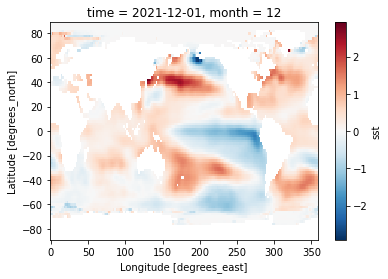

In [7]:
mean_mn_sst_anom = mean_mn_sst.groupby('time.month') - mean_mn_sst.groupby('time.month').mean('time')
mean_mn_sst_anom.sst.sel(time='2021-12-01').plot()

### Calculate the first 10 leading EFOs of the 1979-2021 monthly SST anomlies

In [9]:
from eofs.standard import Eof

In [11]:
solver = Eof(mean_mn_sst_anom.sst.values)
solver

In [14]:
eofs = solver.eofs(neofs=10)
pcs = solver.pcs(npcs=10)
variances = solver.varianceFraction()

#### Spatially plot the first EOF

Text(0.5, 1.0, 'EOF 1 of Monthly SST anoms (1979-2021) from NOAA SST v5 Data')

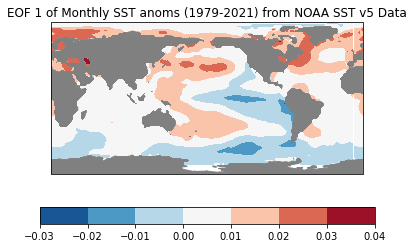

In [22]:
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=190))
ax.add_feature(cartopy.feature.LAND, facecolor='grey')
c = ax.contourf(mean_mn_sst_anom.lon, mean_mn_sst_anom.lat, eofs[0,:,:],levels=np.arange(-0.03, 0.04, 0.01), transform=cartopy.crs.PlateCarree(), cmap='RdBu_r')
plt.colorbar(c, orientation='horizontal')
plt.title('EOF 1 of Monthly SST anoms (1979-2021) from NOAA SST v5 Data')

Text(0.5, 1.0, 'EOF 2 of Monthly SST anoms (1979-2021) from NOAA SST v5 Data')

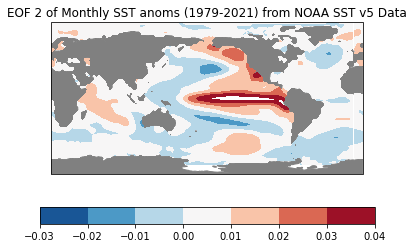

In [21]:
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=190))
ax.add_feature(cartopy.feature.LAND, facecolor='grey')
c = ax.contourf(mean_mn_sst_anom.lon, mean_mn_sst_anom.lat, eofs[1,:,:],levels=np.arange(-0.03, 0.04, 0.01), transform=cartopy.crs.PlateCarree(), cmap='RdBu_r')
plt.colorbar(c, orientation='horizontal')
plt.title('EOF 2 of Monthly SST anoms (1979-2021) from NOAA SST v5 Data')

### Plot PC1 as a function of time

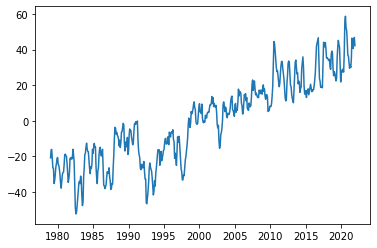

In [24]:
plt.plot(mean_mn_sst_anom.time, pcs[:,0])

In [25]:
variances.shape

(516,)

#### Examine the variances of the leading EOFs

Text(0.5, 1.0, 'Variance by EOF number for SST Anoms')

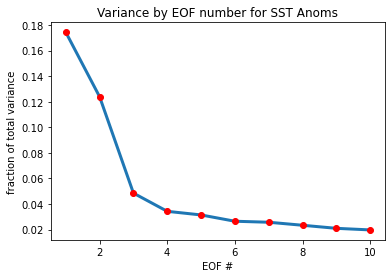

In [27]:
plt.plot(range(1,11,1), variances[0:10], linewidth=3)
plt.plot(range(1,11,1), variances[0:10], linestyle='None', marker='o', color='red')
plt.xlabel('EOF #')
plt.ylabel('fraction of total variance')
plt.title('Variance by EOF number for SST Anoms')